#### import dependencies and setup

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

# Import API key
from config import api_key
from citipy import citipy

#### generate cities list

In [5]:
# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# nearest city for each lat, lng mix
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{len(cities)} cities had been saved")

601 cities had been saved


#### call API

In [13]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_country = city_weather["sys"]["country"]  
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"city":city,
                      'Latitude':city_lat,
                      'Longitude':city_lng,
                      'Country':city_country,
                      'Max Temp':city_mtemp,
                      'Humidity':city_humidity,
                      'Cloudiness':city_cloudiness,
                      'Wind Speed':city_wspeed,
                      })
        print(f'Processing... {city}')
    except:
        print("city not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing... harindanga
Processing... carnarvon
Processing... avarua
Processing... tamale
Processing... krasnyy
Processing... khatanga
Processing... sterlibashevo
Processing... maragogi
Processing... renala khurd
Processing... luderitz
city not found. Skipping...
Processing... evensk
Processing... bandarbeyla
Processing... hermanus
Processing... busselton
Processing... chokurdakh
Processing... jamestown
Processing... punta arenas
Processing... bengkulu
Processing... mataura
Processing... makinsk
Processing... albany
Processing... lasa
Processing... maple creek
Processing... soyo
Processing... chuy
Processing... san quintin
Processing... todos santos
Processing... yellowknife
Processing... butaritari
Processing... atuona
Processing... xining
Processing... ushuaia
Processing... araouane
city not found. Skipping...
Processing... saint-philippe
Processing... roma
city not found. Skipping...
Processing... rikitea
Processing... mud

In [14]:
#creating a dataframe
city_df = pd.DataFrame(city_data)

# re arranging the columns in data frame 
city_df = city_df [['city','Cloudiness','Humidity','Latitude','Longitude','Country', 'Max Temp','Wind Speed']]
city_df.head()

,city,Cloudiness,Humidity,Latitude,Longitude,Country,Max Temp,Wind Speed
0,harindanga,40,94,22.04,88.32,IN,84.20,4.70
1,carnarvon,75,100,-24.87,113.63,AU,62.60,10.29
2,avarua,0,73,-21.21,-159.78,CK,71.60,9.17
3,tamale,100,95,9.40,-0.84,GH,73.42,7.52
4,krasnyy,100,87,54.57,31.43,RU,53.67,6.26


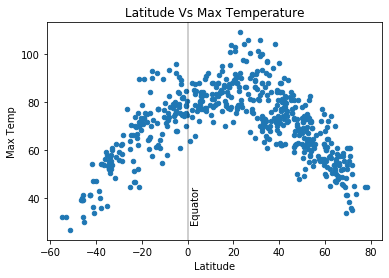

In [16]:
## Temperature vs Latitude
#plt.scatter(city_df['Latitude'],city_df['Max Temp'],)
city_df.plot(x = 'Latitude',y = 'Max Temp',kind ='scatter',title="Latitude Vs Max Temperature",grid = False)
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator') #adds equator line
plt.text(1,30,'Equator',rotation=90)

# save the figure 
plt.savefig("output_plots/Max_Temp_vs_Latitude.png")

# Display the plot 
plt.show()

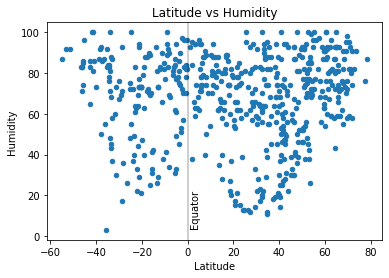

In [14]:
# Humidity vs Latitude
city_df.plot(x='Latitude',y='Humidity',kind = 'scatter',title ="Latitude vs Humidity",grid = False)
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator') #adds equator line
plt.text(1,5,'Equator',rotation=90)

# save the figure 
plt.savefig("output_plots/Humidity_vs_Latitude.png")
# Display the plot 
plt.show()

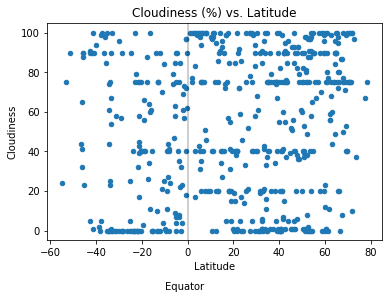

In [25]:
# Cloudiness vs Latitude
city_df.plot(x='Latitude',y='Cloudiness',kind = 'scatter',title ="Cloudiness (%) vs. Latitude",grid = False)
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator') #adds equator line
plt.text(-10,-30,'Equator')

# save the figure 
plt.savefig("output_plots/Cloudiness_vs_Latitude.png")

# Display the plot 
plt.show()

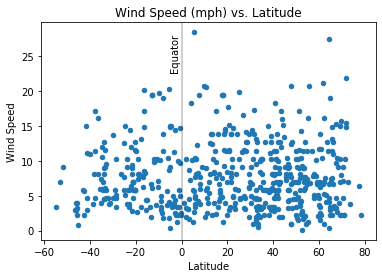

In [33]:
# WindSpeed vs Latitude
city_df.plot(x='Latitude',y='Wind Speed',kind = 'scatter',title ="Wind Speed (mph) vs. Latitude",grid = False) 
plt.axvline(0, color = 'black', alpha = .25, label = 'Equator') #adds equator line
plt.text(-5, 23,'Equator', rotation=90)

# Save the figure
plt.savefig("output_plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

#### linear regressions

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) > 0, :]
southern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) < 0, :]

##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

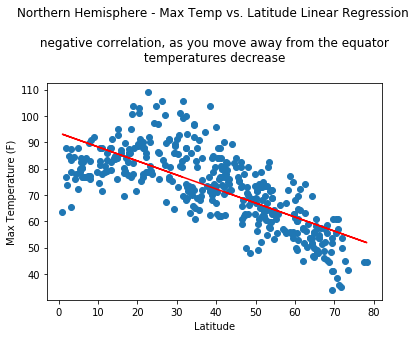

In [126]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression \n \n negative correlation, as you move away from the equator \n temperatures decrease \n')
# print("The regression displays a negative correlation.")
# print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

##### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

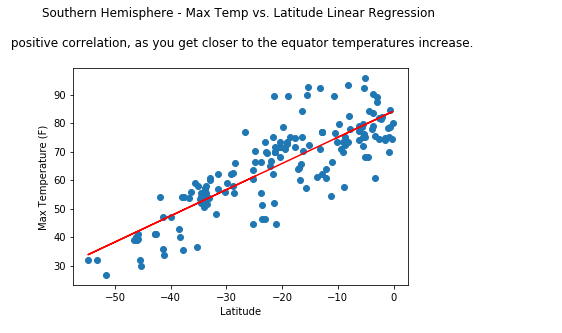

In [127]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression \n \n positive correlation, as you get closer to the equator temperatures increase.\n')
plt.show()

##### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

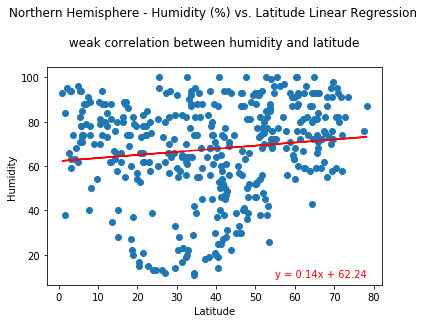

In [114]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression \n \n weak correlation between humidity and latitude \n')
plt.show()

##### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

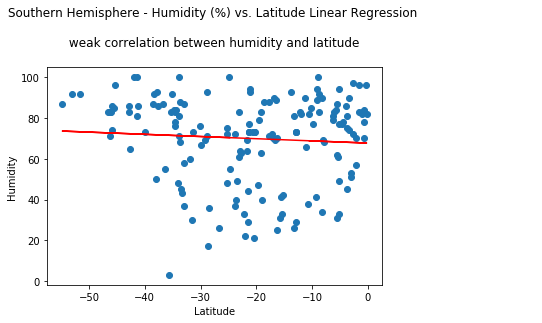

In [128]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression \n \n weak correlation between humidity and latitude \n')
plt.show()

##### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

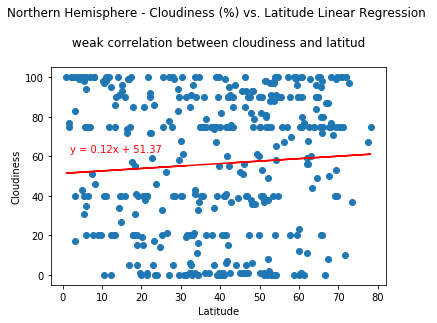

In [120]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,62),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression \n \n weak correlation between cloudiness and latitud \n')
plt.show()

##### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

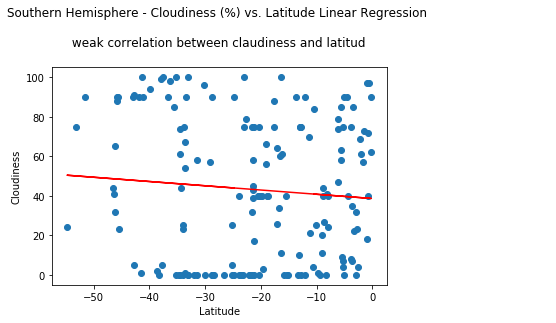

In [129]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression \n \n weak correlation between claudiness and latitud \n')
plt.show()

##### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

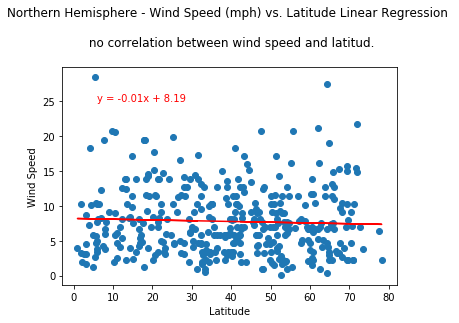

In [130]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression \n \n no correlation between wind speed and latitud.\n')
plt.show()

##### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

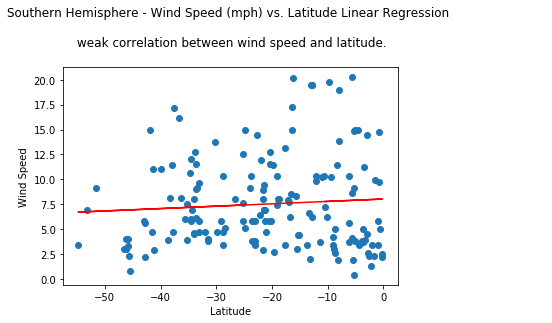

In [125]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression \n \n weak correlation between wind speed and latitude.\n')
plt.show()

In [15]:
# save the Dataframe to csv file 
output_data_file = "output_data/cities.csv"
city_df.to_csv(output_data_file,index_label ="city_id")